In [2]:
import jax.numpy as np
from jax import grad, jit, vmap
from jax import random
import matplotlib.pyplot as plt

from svgd import svgd

/home/lauro/.virtualenvs/msc-thesis/lib/python3.6/site-packages/jax/lib/xla_bridge.py:122: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


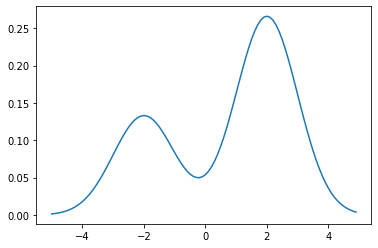

In [3]:
from jax.scipy.stats import norm

@jit
def kernel_param_update_rule(x):
    assert x.ndim == 2
    n = x.shape[0]
    
    h = np.median(pairwise_distances(x))**2 / np.log(n)
    return h

def p(x):
    """
    IN: single scalar np array x. alternatively, [x] works too
    OUT: scalar logp(x)
    """
    out = 1/3 * norm.pdf(x, loc=-2, scale=1) + 2/3 * norm.pdf(x, loc=2, scale=1)
    return np.squeeze(out) # to be able to take a gradient, output must be scalar

grid = np.arange(-5, 5, 0.1)
_ = plt.plot(grid, p(grid))

def logp(x):
    return np.log(p(x))

Now go over different kernels

In [55]:
n = 30
d = 1
stepsize = 0.01
L = int(1 / stepsize)

# generate data
key = random.PRNGKey(0)
x0 = random.normal(key, (n,d))
x0 = x0 - 10 # sampled from q_0
x = x0

kernel_param_grid = np.logspace(-4, 6, num=30, base=2)

logs = []
mse1s = []
mse2s = []
for h in kernel_param_grid:
    xout, log = svgd(x, logp, stepsize, h, L)
    logs.append(log)
    mse1s.append((np.mean(xout) - 2/3)**2)
    mse2s.append((np.mean(xout**2) - 5)**2)

/home/lauro/.virtualenvs/msc-thesis/lib/python3.6/site-packages/jax/lax/lax.py:4665: UserWarning: Explicitly requested dtype float64 requested in asarray is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))
/home/lauro/.virtualenvs/msc-thesis/lib/python3.6/site-packages/jax/lax/lax.py:4665: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))


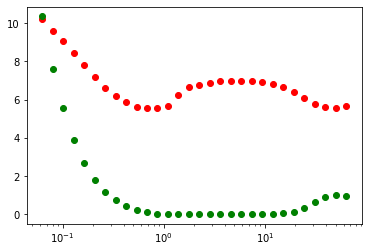

In [56]:
plt.subplots_adjust(hspace=0.8)

# plt.subplot(211)
plt.plot(kernel_param_grid, mse1s, 'ro')
plt.xscale('log')

# plt.subplot(212)
plt.plot(kernel_param_grid, mse2s, 'go')
plt.xscale('log')